# Using satellite imagery to train a model for identifying the type of landmarks

## Revision History

| Revision | Author         | Revision date     | Comments 
|---------:|:---------------|------------------:|:-
| 1.10.1   | [Leomar Duran] | 2022-04-21t04:27Q | [compare train/test errors to IQR/SD]
| 1.10.0   | [Leomar Duran] | 2022-04-20t14:45Q | [error analysis of linear model]
| 1.9.0    | [Leomar Duran] | 2022-04-20t05:15Q | [fixed bar plot]
| 1.9.0    | [Leomar Duran] | 2022-04-20t04:16Q | [evaluating model, at bar plot]
| 1.8.0    | [Leomar Duran] | 2022-04-20t00:42Q | [normalized the `X` data]
| 1.7.0    | [Leomar Duran] | 2022-04-19t23:48Q | [reading in test data]
| 1.6.0    | [Leomar Duran] | 2022-04-19t22:20Q | [removed linearly dependent columns]
| 1.5.1    | [Leomar Duran] | 2022-04-19t21:38Q | [fixed headers, finished correlation]
| 1.4.1    | [Leomar Duran] | 2022-04-19t18:11Q | [found data skewness]
| 1.4.0    | [Leomar Duran] | 2022-04-19t17:15Q | [found data shapes]
| 1.3.0    | [Leomar Duran] | 2022-04-19t16:30Q | [comparing skewness impl'ns, revision history]
| 1.2.0    | [Leomar Duran] | 2022-04-19t04:55Q | [graphs of distributions]
| 1.1.2    | [Leomar Duran] | 2022-04-19t04:24Q | [fixed axis of `df` combination]
| 1.1.1    | [Leomar Duran] | 2022-04-19t04:15Q | [cleaned cell IDs, execution counts]
| 1.1.0    | [Leomar Duran] | 2022-04-19t04:11Q | [combine `X`...,`y_train`]
| 1.0.1    | [Leomar Duran] | 2022-04-19t03:17Q | [reporting results of model]
| 1.0.0    | [Leomar Duran] | 2022-04-19t02:05Q | [regression on sampled data, not yet preprocessed]
| 0.1.1    | [Leomar Duran] | 2022-04-11t12:37Q | [reading from dataset sampled by iterators][iterators]
| 0.1.0    | [Leomar Duran] | 2022-04-10t02:56Q | [try chunking and concatenating dataframe][counting]
| 0.0.0    | [Leomar Duran] | 2022-04-07t09:04Q | [try to `read_csv` before sampling][read_csv attempt]

[Leomar Duran]: https://github.com/lduran2

[comparing skewness impl'ns, revision history]: https://github.com/lduran2/CIS3715_DataScience_2022/blob/182efedb6965687199cc1ac746f500b020ff5997/final/final_project_on_sat4.ipynb
[graphs of distributions]:
https://github.com/lduran2/CIS3715_DataScience_2022/blob/b2ad2c3d22d3872748ced1f658f2577fbc88f3e8/final/final_project_on_sat4.ipynb
[fixed axis of `df` combination]: https://github.com/lduran2/CIS3715_DataScience_2022/blob/aee857268ceffab8c7d4a78f9c8dcda78062d6b6/final/final_project_on_sat4.ipynb
[cleaned cell IDs, execution counts]: https://github.com/lduran2/CIS3715_DataScience_2022/blob/1ad0bba7a6ea643e5cc2cb9f62b6e07182567146/final/final_project_on_sat4.ipynb
[combine `X`...,`y_train`]: https://github.com/lduran2/CIS3715_DataScience_2022/blob/7d87488e3d5ca81d05b33611c90cc9f9a6ca0496/final/final_project_on_sat4.ipynb
[reporting results of model]: https://github.com/lduran2/CIS3715_DataScience_2022/blob/44d22dc8312cc70b9540ce5d54f3a29e8f6a047e/final/final_project_on_sat4.ipynb
[regression on sampled data, not yet preprocessed]: 
https://github.com/lduran2/CIS3715_DataScience_2022/blob/80ead75b475b7e43330d886df804f2fdc2b7bfd6/final/final_project_on_sat4.ipynb

[iterators]: https://github.com/lduran2/CIS3715_DataScience_2022/blob/44eebb02f22dfc634019334761d972ebb605beae/final/final_project_on_sat4.ipynb
[counting]: https://github.com/lduran2/CIS3715_DataScience_2022/blob/a6183da495392258cf5793fc532c2464d78983ad/final/final_project_on_sat4.ipynb
[read_csv attempt]: https://github.com/lduran2/CIS3715_DataScience_2022/blob/ce95ec120fe3b11c5db5764c93a74365fff04d42/final/final_project_on_sat4.ipynb

## Sampling

Because of the memory limitations of my computer,
I cannot load the entire dataset into memory and perform operations on it.
As a result,
I will instead sample both datasets into ${20000}$ examples
before working with them.

In [ ]:
# the sampling script that I wrote
from sample_dataset import mainarg as sample_from_filename

# filenames for training and test data
data_filenames = ['dataset/X_train_sat4.csv', 'dataset/X_test_sat4.csv']

# loop through filenames
for filename in data_filenames:
    sample_from_filename(filename)
# next filename


===reading from===
dataset\X_train_sat4.csv
dataset\y_train_sat4.csv
===writing to===
dataset\X_train_sat4_samp20000.csv
dataset\y_train_sat4_samp20000.csv
===sampling from 399999 examples===
0. copying from <_io.TextIOWrapper name='dataset\\y_train_sat4.csv' mode='r' encoding='cp1252'>
1. copying from <_io.TextIOWrapper name='dataset\\X_train_sat4.csv' mode='r' encoding='cp1252'>
writing to dataset\y_train_sat4_samp20000.csv
writing to dataset\X_train_sat4_samp20000.csv

===reading from===
dataset\X_test_sat4.csv
dataset\y_test_sat4.csv
===writing to===
dataset\X_test_sat4_samp20000.csv
dataset\y_test_sat4_samp20000.csv
===sampling from 99999 examples===
0. copying from <_io.TextIOWrapper name='dataset\\y_test_sat4.csv' mode='r' encoding='cp1252'>
1. copying from <_io.TextIOWrapper name='dataset\\X_test_sat4.csv' mode='r' encoding='cp1252'>
writing to dataset\y_test_sat4_samp20000.csv
writing to dataset\X_test_sat4_samp20000.csv


## Preprocess data

Now we may work with the data.

Start by importing necessary modules
and setting up important constants.

In [ ]:
import pandas as pd                                         # for the dataframes
from math import *                                          # for sqrt
import numpy as np                                          # for linear algebra
import matplotlib.pyplot as plt                             # for various plots
from sklearn.linear_model import LinearRegression           # for the learning models
from sklearn.metrics \
    import mean_absolute_error, mean_squared_error          # for evaluating models

In [ ]:
# constants
X_TRAIN_FILENAME = r'dataset/X_train_sat4_samp20000.csv'    # filename of the training dataset input
Y_TRAIN_FILENAME = r'dataset/y_train_sat4_samp20000.csv'    # filename of the training dataset output
X_TEST_FILENAME = r'dataset/X_test_sat4_samp20000.csv'      # filename of the testing dataset input
Y_TEST_FILENAME = r'dataset/y_test_sat4_samp20000.csv'      # filename of the testing dataset output

R2_TOLERANCE = 0.81                                         # use 0.81 for r^2 for strong correlations
LABEL_TOLERANCE = 0.7                                       # minimum for a set bit in a label

Read in the files
and do a high level inspection.

In [ ]:
# read in the training data
X_train = pd.read_csv(X_TRAIN_FILENAME, header=None, index_col=None)
y_train = pd.read_csv(Y_TRAIN_FILENAME, header=None, index_col=None)

In [ ]:
# data shape constants
(N_XAMPS, N_FEATS) = X_train.shape
(_, N_LBLS) = y_train.shape
# colors for grapphing
CHANNELS = (r'r', r'g', r'b', r'maroon')
N_CHANNELS = len(CHANNELS)
# number of pixels
NF_PIXELS = N_FEATS/N_CHANNELS
F_WIDTH = sqrt(NF_PIXELS)
F_HEIGHT = NF_PIXELS/F_WIDTH
# round number of pixels
NI_PIXELS = int(NF_PIXELS)
I_WIDTH = int(F_WIDTH)
I_HEIGHT = int(F_HEIGHT)

print(r"{} images of ({}x{})px x {} channels".format(N_XAMPS, I_WIDTH, I_HEIGHT, N_CHANNELS))

20000 images of (28x28)px x 4 channels


In [ ]:
# combine training data features, labels
df_train = pd.concat([X_train, y_train], axis=1)

In [ ]:
# print shapes of X, y
print("X_train shape\t{}".format(X_train.shape))
print("y_train shape\t{}".format(y_train.shape))
print("combined shape\t{}".format(df_train.shape))

X_train shape	(20000, 3136)
y_train shape	(20000, 4)
combined shape	(20000, 3140)


In [ ]:
# print some basic information about the dataset
print('\n===data frame information===')
df_train.info()

# print its parameters
print('\n===data frame parameters===')
df_train.describe()


===data frame information===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 3140 entries, 0 to 3
dtypes: int64(3140)
memory usage: 479.1 MB

===data frame parameters===


,0,1,2,3,4,5,6,7,8,9,...,3130,3131,3132,3133,3134,3135,0,1,2,3
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,127.778700,123.954900,110.979800,158.810900,127.608900,123.83680,110.863550,158.690150,127.607600,123.907450,...,111.151800,158.804500,128.173150,124.216950,111.20020,158.91350,0.263800,0.201600,0.178600,0.356000
std,42.825413,37.944932,35.705831,37.819527,42.946379,38.08994,35.786297,37.861817,42.864149,37.943326,...,35.980267,37.691749,42.905264,37.907691,35.64033,37.59736,0.440703,0.401205,0.383027,0.478827
min,0.000000,3.000000,1.000000,4.000000,0.000000,2.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,0.00000,3.00000,0.000000,0.000000,0.000000,0.000000
25%,98.000000,99.000000,89.000000,140.000000,98.000000,99.00000,89.000000,140.000000,98.000000,99.000000,...,89.000000,140.000000,99.000000,100.000000,89.00000,140.00000,0.000000,0.000000,0.000000,0.000000
50%,124.000000,122.000000,110.000000,166.000000,123.000000,122.00000,109.000000,166.000000,123.000000,122.000000,...,110.000000,166.000000,124.000000,122.000000,110.00000,166.00000,0.000000,0.000000,0.000000,0.000000
75%,159.000000,148.000000,132.000000,185.000000,159.000000,148.00000,132.000000,185.000000,158.000000,148.000000,...,133.000000,185.000000,159.000000,148.000000,133.00000,185.00000,1.000000,0.000000,0.000000,1.000000
max,255.000000,255.000000,255.000000,253.000000,244.000000,255.00000,255.000000,252.000000,246.000000,255.000000,...,255.000000,254.000000,248.000000,251.000000,255.00000,245.00000,1.000000,1.000000,1.000000,1.000000


We can see from these summaries that all $3140$ columns, features and labels, are `int64`, and thus numerical features.

In [ ]:
# calculate the number of missing values
n_missing = df_train.isnull().sum()

# print the number missing for each column,
# but ignore 0s since there are so many columns
print(r'===# missing values per column===')
print(n_missing[n_missing != 0])

===# missing values per column===
Series([], dtype: int64)


Additionally, we find that there are no columns with missing values.
Let's inspect the distributions of each feature and the label.

Since there are so many features ($3136$),
we will plot the skewness of each feature
by pixel row,
rather than a histogram.

In [ ]:
# centralize the data frame
central_X = X_train - X_train.mean()
# calculate standard deviations
X_std = X_train.std()
# calculate the skews of each column
skews = N_XAMPS*(central_X**3).sum()/((N_XAMPS - 1)*(N_XAMPS - 2)*X_std**3)

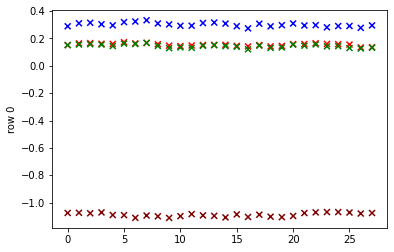

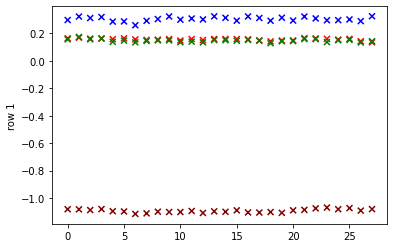

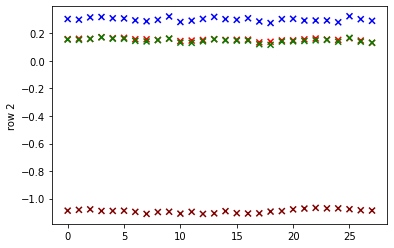

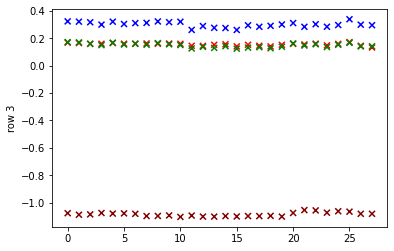

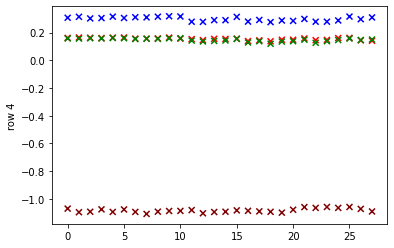

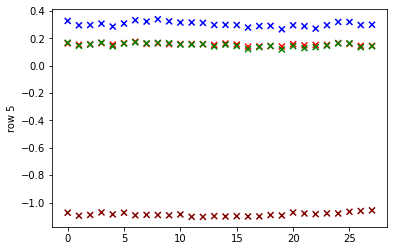

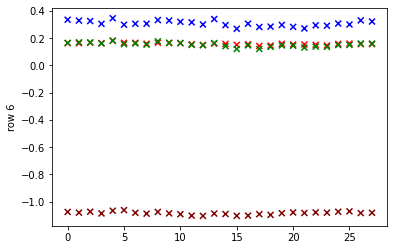

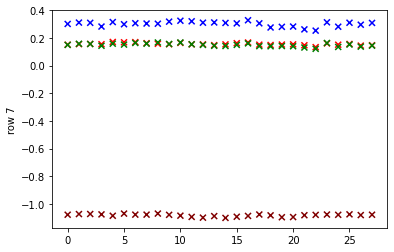

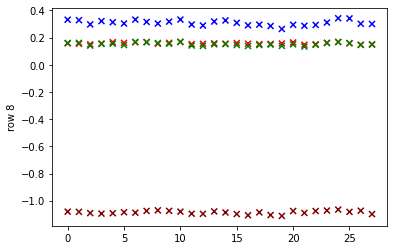

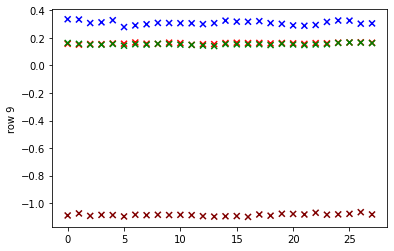

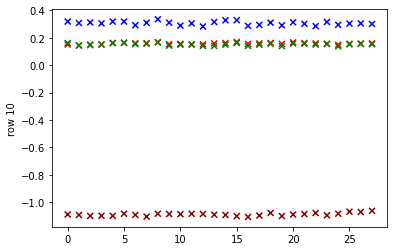

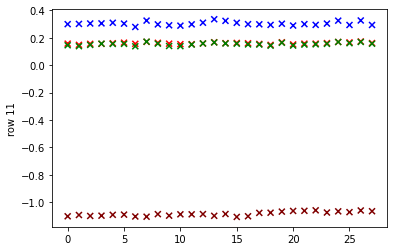

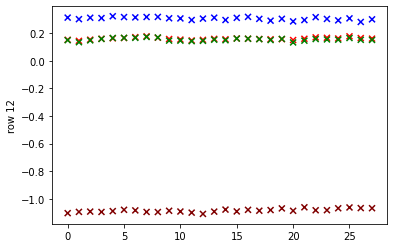

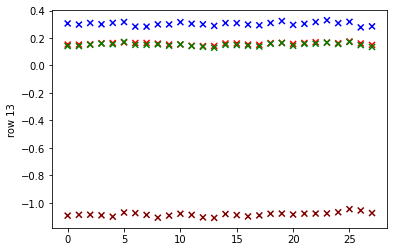

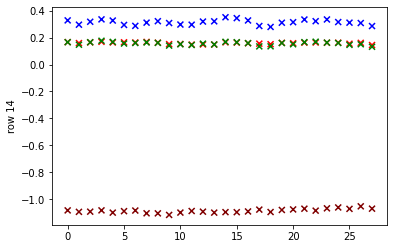

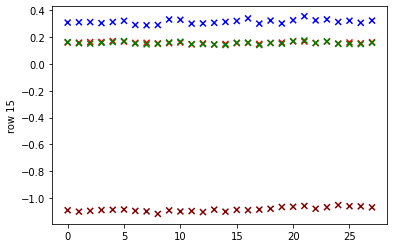

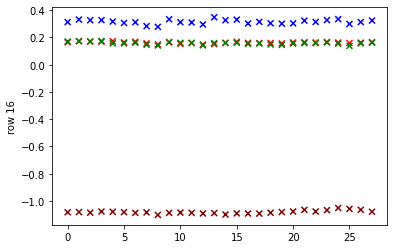

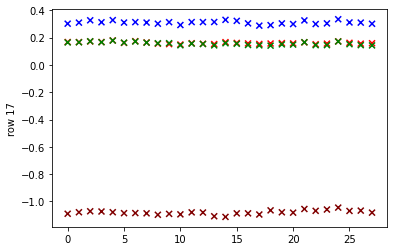

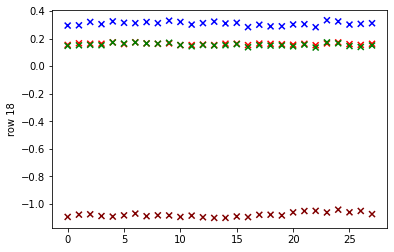

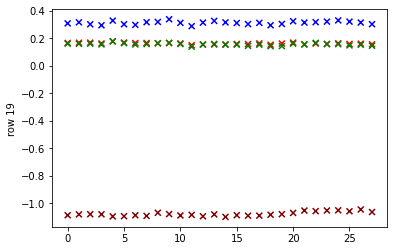

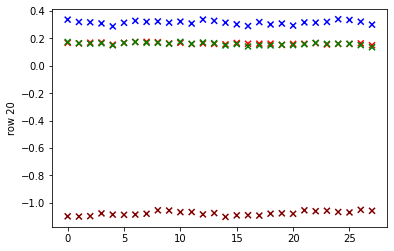

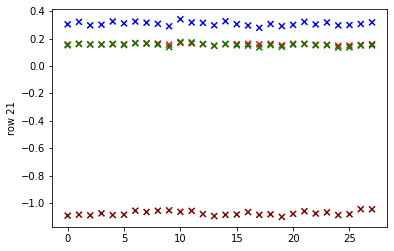

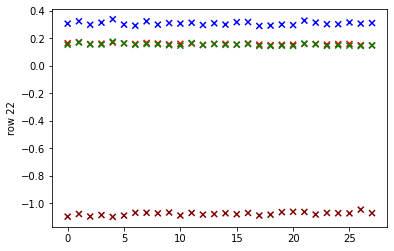

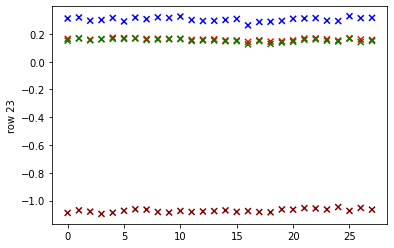

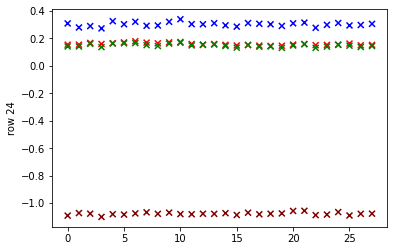

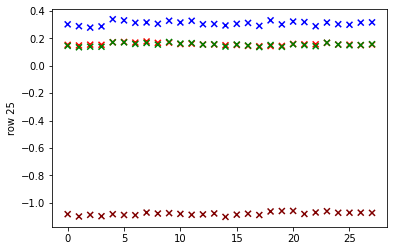

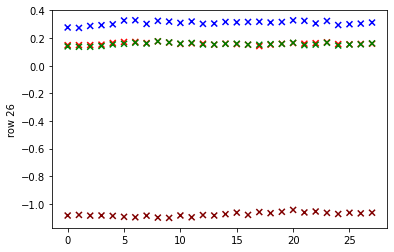

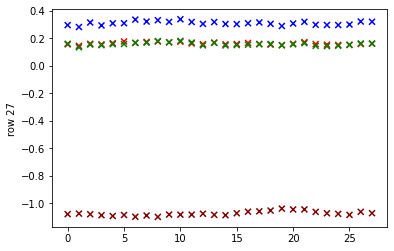

In [ ]:
# let's scatter graph the features
# 28x28, color code RGB
# x's in scatter graph
scatter_x = sum(([k]*N_CHANNELS for k in range(I_WIDTH)), [])
# colors for the scatter graph
scatter_colors = (CHANNELS*I_WIDTH)
# its size
ROW_SIZE = (N_CHANNELS*I_WIDTH)

# loop through pixel rows
for i_row in range(0, I_HEIGHT):
    # offset in data frame for this row
    offset = (i_row*ROW_SIZE)
    # create the row as a list
    row = list(skews[X_train.columns[offset:(offset + ROW_SIZE)]])
    # plot the row
    plt.scatter(scatter_x, row, c=scatter_colors, marker='x')
    plt.ylabel("row {}".format(i_row))
    plt.show()
# next i_row

We can see from these scatter plots that:
* the red, green and blue channel are consistently approximately semetric
($\in [-0.5, 0.5]$)
(especially the red and green colors).
Thus they are non-long tail distributions.
* the near infrared (NIR) channel are consistently highly skewed negative
($\in [-\infty,-1.0]$).
Thus this is a long tail distribution.

Therefore, if there were missing values for us to replace,
we would use the mean for the red, green and blue channels,
and the median for the NIR channel.

Next, we see the correlations to find any features that we can remove.

In [ ]:
# calculate the square correlations
X_cor2 = X_train.cov()**2
X_var = X_std**2
X_varprod = pd.DataFrame([(v0*v1) for v1 in X_var] for v0 in X_var)
# normalize X_cor2 using the product of the corresponding variances
X_cor2 = (X_cor2 / X_varprod)

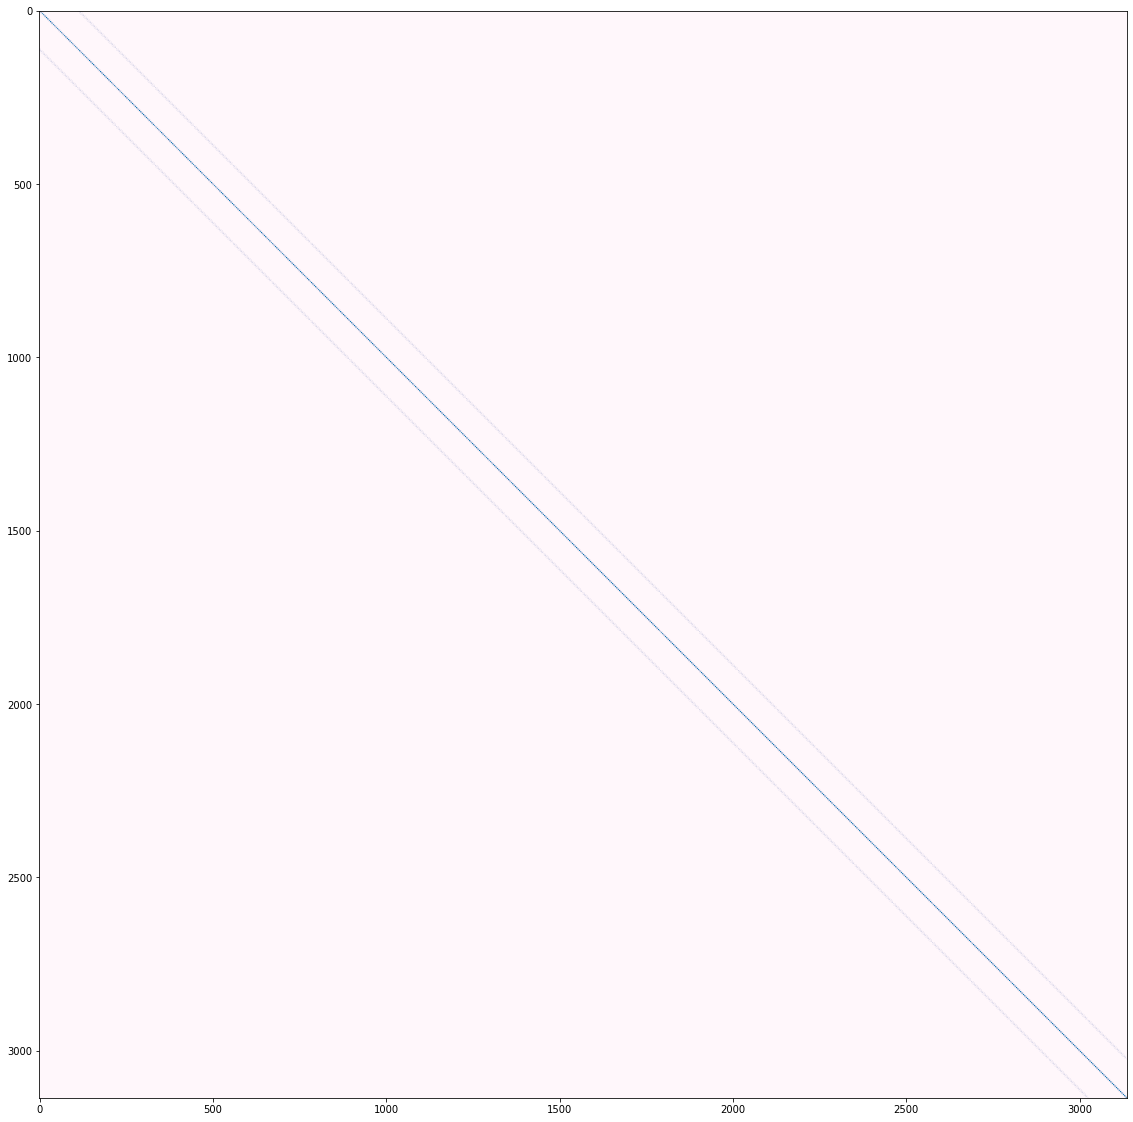

In [ ]:
# find strong correlations
is_strong_corr = (X_cor2 >= R2_TOLERANCE)
# graph results
plt.figure(figsize=(20, 20))
plt.imshow(is_strong_corr, cmap='PuBu')
plt.show()

In [ ]:
# create a table of the strong correlations per feature
i_strong_corr_per_feat = pd.DataFrame(is_strong_corr[k].to_numpy().nonzero() for k in range(N_FEATS))
i_strong_corr_per_feat

,0
0,"[0, 1, 4, 112, 116]"
1,"[0, 1, 2]"
2,"[1, 2]"
3,"[3, 115]"
4,"[0, 4, 5, 8, 112, 116, 120]"
...,...
3131,"[3019, 3131]"
3132,"[3016, 3020, 3128, 3132, 3133, 3134]"
3133,"[3132, 3133, 3134]"
3134,"[3132, 3133, 3134]"


Going by domain knowledge of the features,
we know that they are all linearly independent.

There seem to be strong correlations
at about $112$ flattened pixels from each pixel in either direction
of most pixels
corresponding to
$112\,\text{px} \times \frac{1\,\text{row}}{28\,\text{px}} = 4\,\text{rows}$
up or down respectively.

Finally, the labels are one-hot encoded, representing

| terrain type  | `1000` | `0100` | `0010` | `0001` |
|:--------------|-------:|-------:|-------:|-------:|
| `barren_land` |     1  |     0  |     0  |     0  |
| `trees`       |     0  |     1  |     0  |     0  |
| `grassland`   |     0  |     0  |     1  |     0  |
| `none`        |     0  |     0  |     0  |     1  |


Now to see how balanced the target data is, we use a bar plot.

===y_train===
       0  1  2  3
0      0  1  0  0
1      1  0  0  0
2      0  0  0  1
3      1  0  0  0
4      1  0  0  0
...   .. .. .. ..
19995  0  0  1  0
19996  1  0  0  0
19997  1  0  0  0
19998  0  1  0  0
19999  0  0  1  0

[20000 rows x 4 columns]

===value counts===
0  1  2  3
0  0  0  1    7120
1  0  0  0    5276
0  1  0  0    4032
   0  1  0    3572
dtype: int64

rate of difference = 1  2  3
0  0  0   NaN
      1   NaN
   1  0   NaN
1  0  0   NaN
dtype: float64


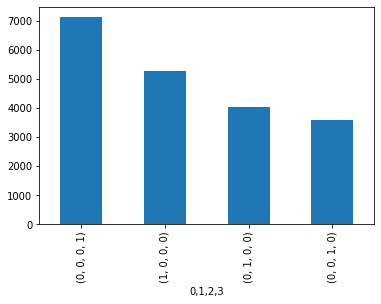

In [ ]:
# find the label and its label counts
y_train_counts = y_train.value_counts()
r_diff = 2*abs(y_train_counts[0] - y_train_counts[1])/(y_train_counts[0] + y_train_counts[1])

# print and bar plot of the label
print(r'===y_train===')
print(y_train)
print()
print(r'===value counts===')
print(y_train_counts)
print()
print(r"rate of difference = {}".format(r_diff))
y_train_counts.plot(kind=r'bar')
plt.show()

We see that these total

$$
    \begin{array}{@{}rr@{}}
    \hline
        \text{encoding} & \text{multiplicity}
    \\
    \hline
        1000            &  5276
    \\
        0100            &  4032
    \\
        0010            &  3572
    \\
        0001            &  7120
    \\
    \hline
        \sum            & 20000\rlap.
    \\
    \hline
    \end{array}
$$

Now consider that we have a vector $\vec{v}$ of $4$ Boolean integers. 
Well in our case,
$$
    \mathbf{1}_4^\intercal
    \mathbf{v}
    = 1.
$$

Thus for any order, it is the case that $v_4 = 1 - (v_1 + v_2 + v_3)$.
Therefore, we can remove one of these label columns and have a linearly independent set of columns.
I choose to remove `0001` because it is the last column.

In [ ]:
# columns to keep for linear independence
y_lind_cols = y_train.columns[0:-1]
# remove the last column of the the labels
y_train_lind = y_train[y_lind_cols]
# confirm the removal
print(y_train_lind.shape)

(20000, 3)


## Split the data and normalize the features of examples according to training data

In [ ]:
# read in the testing data (stored in a separate set of files)
X_test = pd.read_csv(X_TEST_FILENAME, header=None, index_col=None)
y_test = pd.read_csv(Y_TEST_FILENAME, header=None, index_col=None)

# remove the last label column for test data for linear independence too
y_test_lind = y_test[y_lind_cols]

# data shape constants
(N_TEST_XAMPS, N_TEST_FEATS) = X_test.shape
(_, N_TEST_LBLS) = y_test_lind.shape

# confirm the shapes
print("# test examples:\t{}".format(N_TEST_XAMPS))
print("# test features:\t{}".format(N_TEST_FEATS))
print("# test labels:\t{}".format(N_TEST_LBLS))

# test examples:	20000
# test features:	3136
# test labels:	3


Next we normalize.
However, first we check if there are outliers
($1.5\,I\!Q\!R$s outside of the range $[Q_1, Q_3]$)
on $\mathbf{x}$'s data frame.

In [ ]:
def find_outliers(X):
    r'''
     Finds the outliers in data frame X.
     @param X : pd.DataFrame = to search for outliers
     @return (inlier_min, inlier_max, outliers) = lower and upper
     bounds of outliers, and the outliers in X
     '''
    # find the interquartile range
    q1, q3 = (X.quantile(q=q) for q in np.array([1, 3])*0.25)
    iqr = q3 - q1
    # calculate limits of the outlier
    inlier_min = (q1 - 1.5*iqr)
    inlier_max = (q3 + 1.5*iqr)
    # find any values out of range
    outliers = ((X < inlier_min) | (X > inlier_max))
    # return the result
    return (inlier_min, inlier_max, outliers)
# def find_outliers(X)

In [ ]:
# check if outliers
(inlier_min, inlier_max, outliers) = find_outliers(X_train)
# print the limits
print(r'===outlier lower limit===')
print(inlier_min)
print()
print(r'===outlier upper limit===')
print(inlier_max)
print()
# print whether any outliers
print(r'===has outliers?===')
print(outliers.any())

===outlier lower limit===
0      -2.831933
1      -2.594679
2      -2.422008
3      -2.282178
4      -2.820003
          ...   
3131   -2.289745
3132   -2.777588
3133   -2.538191
3134   -2.474730
3135   -2.298393
Length: 3136, dtype: float64

===outlier upper limit===
0       2.865619
1       2.570702
2       2.395133
3       2.477268
4       2.861501
          ...   
3131    2.485836
3132    2.816131
3133    2.526745
3134    2.463496
3135    2.489177
Length: 3136, dtype: float64

===has outliers?===
0       True
1       True
2       True
3       True
4       True
        ... 
3131    True
3132    True
3133    True
3134    True
3135    True
Length: 3136, dtype: bool


Since we found at least $1$ column with outliers,
we will use
standardization ($Z$-score normalization),
rather than min-max normalization.

In [ ]:
# standardization
means = X_train.mean(axis=0)
stds = X_train.std(axis=0)

# find the z-scores, replacing X_train, X_test
X_train, X_test = ((X - means)/stds for X in (X_train, X_test))

# for the mean and standard deviation
for name, stat in (('mean', X_train.mean()), ('standard devaition', X_train.std())):
    (_, _, stat_outliers) = find_outliers(stat)
    print(r"===standardized X_train {} statistics===".format(name))
    print(stat.describe())
    print()
# next name, stat

===standardized X_train mean statistics===
count    3.136000e+03
mean     1.033754e-20
std      7.083755e-18
min     -1.492140e-17
25%     -6.572520e-18
50%      0.000000e+00
75%      6.394885e-18
max      1.634248e-17
dtype: float64

===standardized X_train standard devaition statistics===
count    3.136000e+03
mean     1.000000e+00
std      2.859717e-17
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
dtype: float64



From the statistics of the mean and standard deviation,
we verify that all features' means $\bar{x} \approx 0$
and $S_{\mathbf{X}} \approx 1$ as expected.

## Training the model

Now let's attempt the linear model.

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train_lind)

print("bias:\t{}".format(lr.intercept_))
print("weights:\t{}".format(lr.coef_))

bias:	[0.2638 0.2016 0.1786]
weights:	[[ 0.00349978  0.03350413 -0.02830229 ... -0.00076971 -0.01991985
  -0.01042235]
 [-0.03050444  0.00311614  0.0097701  ...  0.040247    0.00532699
  -0.00593741]
 [-0.0461447   0.02486673  0.00224196 ... -0.0174027   0.01254749
  -0.00033398]]


Find the measures of error agains the training data.

In [ ]:
# check the model fit to training data
y_train_pred = linear.predict(X_train)

# mean errors
mae_train = mean_absolute_error(y_train_pred, y_train_lind)
mse_train = mean_squared_error(y_train_pred, y_train_lind)
rmse_train = np.sqrt(mse_train)

print()
print(r'===fit to the training set===')
print('MAE\t', mae_train)
print('MSE\t', mse_train)
print('RMSE\t', rmse_train)


===fit to the training set===
MAE	 0.2269431044423953
MSE	 0.0882282861134406
RMSE	 0.2970324664299184


## Evaluating the model

Find the measures of error agains the testing data.

In [ ]:
# check the model fit to testing data
# use a data frame wrapper for y_test_pred
y_test_pred = pd.DataFrame(linear.predict(X_test))

# mean errors
mae_test = mean_absolute_error(y_test_pred, y_test_lind)
mse_test = mean_squared_error(y_test_pred, y_test_lind)
rmse_test = np.sqrt(mse_test)

print()
print(r'===fit to the testing set===')
print('MAE\t', mae_test)
print('MSE\t', mse_test)
print('RMSE\t', rmse_test)


===fit to the testing set===
MAE	 0.2712271873978294
MSE	 0.12413254391711741
RMSE	 0.35232448668396216


Let us analyze visually.
First, let's reconstruct the linear dependent column of the labels.

In [ ]:
# add the dependent column to the prediction
# v4 = 1 - (v1 + v2 + v3)
y_test_pred_dep = pd.concat((y_test_pred, (1 - y_test_pred.sum(axis=1))), axis=1, ignore_index=True)

=== y value counts===
0    5194
1    4117
2    3554
3    7135
dtype: int64

=== y' value row sums===
0    5268.622657
1    4080.350228
2    4010.181841
3    6640.845274
dtype: float64



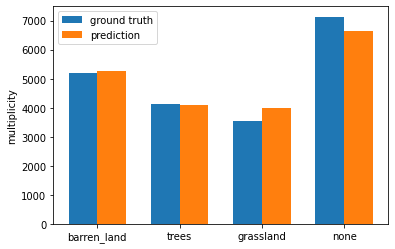

In [ ]:
labels = [r'barren_land', r'trees', r'grassland', r'none']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# print label counts
print(r"=== y value counts===")
print(y_test.sum(axis=0))
print()
print(r"=== y' value row sums===")
print(y_test_pred_dep.sum(axis=0))
print()

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test.sum(axis=0), width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred_dep.sum(axis=0), width, label='prediction')

ax.set_ylabel('multiplicity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

By visual inspection,
the model produces a close fit.
However,
let us normalize the mean errors.

First,
let's check for overfit.

In [ ]:
print("MAE test:train ratio:\t{}".format(mae_test/mae_train))
print("RMSE test:train ratio:\t{}".format(rmse_test/rmse_train))

MAE test:train ratio:	1.1951329742502694
RMSE test:train ratio:	1.1861480696659445


Since both the $M\!A\!E$ and $R\!M\!S\!E$ ratios
are greater than approximately $1$,
this means that the model is not an overfit.

Next, let's compare the $M\!A\!E$ and $R\!M\!S\!E$
of the test data
with the interquartile range and standard deviation respectively
of the training data.

In [ ]:
# find the norms
L1_y_train = (abs(y_train_lind).dot(np.array([1, 1, 1])))
L2_y_train = (((y_train_lind**2).dot(np.array([1, 1, 1])))**(1.0/2.0))

# for MAE, we find the ratio to the IQR of the L1-norm
q1, q3 = (L1_y_train.quantile(q=q) for q in np.array([1, 3])*0.25)
iqr = q3 - q1
mae_iqr_test = mae_test/iqr

# for RMSE, we find the ratio by the standard deviation of the L2-norm
std = L2_y_train.std()
rmse_std_test = rmse_test/std

# display the results
print("IQR:\t{}".format(iqr))
print("SD:\t{}".format(std))
print()

print("MAE test:IQR train:\t{}".format(mae_iqr_test))
print("RMSE test:SD train:\t{}".format(rmse_std_test))

IQR:	1.0
SD:	0.4788271752659708

MAE test:IQR train:	0.2712271873978294
RMSE test:SD train:	0.7358072074507027


Now since the ratios are both $< 1$,
this means that
the mean absolute error is much less than one interquartile range,
and the root mean square error is less than one standard deviation.

This means that the model has a strong predictive power.
However, since $R\!M\!S\!E:\sigma$ is getting close to $1$,
it is a moderately strong predictive power.